# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cast = pd.read_csv('cast.csv')
release_dates = pd.read_csv ('release_dates.csv')
titles = pd.read_csv('titles.csv')

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [2]:
print("\nOverview of DataFrame: cast")
print(cast.info())
print("\nSummary Statistics:")
print(cast.describe())
print("\nCount of Missing Values:")
print(cast.isnull().sum())


Overview of DataFrame: cast
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442902 entries, 0 to 3442901
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 157.6+ MB
None

Summary Statistics:
               year             n
count  3.442902e+06  2.115119e+06
mean   1.987597e+03  1.673178e+01
std    2.837612e+01  3.209100e+01
min    1.894000e+03  1.000000e+00
25%    1.967000e+03  5.000000e+00
50%    1.999000e+03  1.000000e+01
75%    2.011000e+03  2.100000e+01
max    2.115000e+03  3.361300e+04

Count of Missing Values:
title              6
year               0
name               0
type               0
character          8
n            1327783
dtype: int64


cast:
    
'cast' has a total of 3,442,902 rows and 6 columns with the following datatypes: int64, float64, and object.

The columns correspond to: 'title', 'year', 'name', 'type', 'character', and 'n'.
   
   - The 'year' column ranges from 1894 to 2115.
   - The 'n' column has a significant number of missing values.
   - Some entries have missing values in the 'title' and 'character' columns.

In [3]:
print("\nOverview of DataFrame: release_dates")
print(release_dates.info())
print("\nSummary Statistics:")
print(release_dates.describe())
print("\nCount of Missing Values:")
print(release_dates.isnull().sum())


Overview of DataFrame: release_dates
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443486 entries, 0 to 443485
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    443485 non-null  object
 1   year     443486 non-null  int64 
 2   country  443486 non-null  object
 3   date     443486 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB
None

Summary Statistics:
                year
count  443486.000000
mean     1985.554863
std        28.373819
min      1894.000000
25%      1964.000000
50%      1997.000000
75%      2010.000000
max      2115.000000

Count of Missing Values:
title      1
year       0
country    0
date       0
dtype: int64


release_dates:
   
'release_dates' has a total of  443,486 rows and 4 columns with the following datatypes: int64, and object.

The columns correspond to: 'title', 'year', 'country', and 'date'.

- The 'year' column ranges from 1894 to 2115.
- The 'date' column is currently of object type, and its summary statistics are not presented.

In [4]:
print("\nOverview of DataFrame: titles")
print(titles.info())
print("\nSummary Statistics:")
print(titles.describe())
print("\nCount of Missing Values:")
print(titles.isnull().sum())


Overview of DataFrame: titles
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226013 entries, 0 to 226012
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   226012 non-null  object
 1   year    226013 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB
None

Summary Statistics:
                year
count  226013.000000
mean     1985.281294
std        29.816257
min      1894.000000
25%      1965.000000
50%      1994.000000
75%      2011.000000
max      2115.000000

Count of Missing Values:
title    1
year     0
dtype: int64


titles:
    
'titles' has a total of   226,013 rows and 2 columns with the following datatypes: int64, and object.

The columns correspond to: 'title' and 'year'.

- The 'year' column ranges from 1894 to 2115.
- There is a single missing value in the 'title' column.

### 2. How many movies have the title North by Northwest

In [5]:
nbn = titles[titles['title'] == "North by Northwest"]['title'].count()
print(f"The number of movies named 'North by Northwest' is: {nbn}")

The number of movies named 'North by Northwest' is: 1


### 3. How many version of Hamlet are there, when was the first made? the last?

In [6]:
hamlet_versions = titles[titles['title'] == 'Hamlet']

hamlet_versions_count = len(hamlet_versions)
oldest_hamlet = hamlet_versions['year'].min()
latest_hamlet = hamlet_versions['year'].max()

print(f"The number of versions of 'Hamlet' is: {hamlet_versions_count}")
print(f"The first version of 'Hamlet' was made in: {oldest_hamlet}")
print(f"The last version of 'Hamlet' was made in: {latest_hamlet}")

The number of versions of 'Hamlet' is: 20
The first version of 'Hamlet' was made in: 1910
The last version of 'Hamlet' was made in: 2017


### 4. List all the movies called Treasure Island from oldest to newest

In [7]:
titles[titles['title'] == 'Treasure Island'].sort_values(by='year')

,title,year
180911,Treasure Island,1918
108853,Treasure Island,1920
87953,Treasure Island,1934
126321,Treasure Island,1950
190233,Treasure Island,1972
122150,Treasure Island,1973
52099,Treasure Island,1985
36752,Treasure Island,1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [8]:
movies_1950 = titles[titles['year'] == 1950]
movies_1980 = titles[titles['year'] == 1980]
movies_2000 = titles[titles['year'] == 2000]

count_1950 = len(movies_1950)
count_1980 = len(movies_1980)
count_2000 = len(movies_2000)

print(f"Count of movies made in 1950: {count_1950}")
print(f"Count of movies made in 1980: {count_1980}")
print(f"Count of movies made in 2000: {count_2000}")

Count of movies made in 1950: 1109
Count of movies made in 1980: 1750
Count of movies made in 2000: 2568


Conclusions:

As decades pass, there is an increasing accessibility and demand for recording and releasing new movies.

### 6. How big was the cast of Metropolis


In [9]:
metropolis_cast = cast[cast['title'] == 'Metropolis']
metropolis_count = metropolis_cast['name'].count()

print(f"The size of the cast for the movie 'Metropolis' is: {metropolis_count}")

The size of the cast for the movie 'Metropolis' is: 33


### 7. How many roles for actors were there 1950's? 1990's

In [10]:
cast['decade'] = (cast['year'] // 10) * 10


roles_1950s = cast[(cast['decade'] == 1950) & (cast['type'] == 'actor')]
roles_1990s = cast[(cast['decade'] == 1990) & (cast['type'] == 'actor')]

roles_1950s_count = len(roles_1950s)
roles_1990s_count = len(roles_1990s)

print(f"The number of roles for actors in the 1950s is: {roles_1950s_count}")
print(f"The number of roles for actors in the 1990s is: {roles_1990s_count}")

The number of roles for actors in the 1950s is: 153559
The number of roles for actors in the 1990s is: 245713


### 8. How many roles for actors & actresses over time? Output should be a line graph

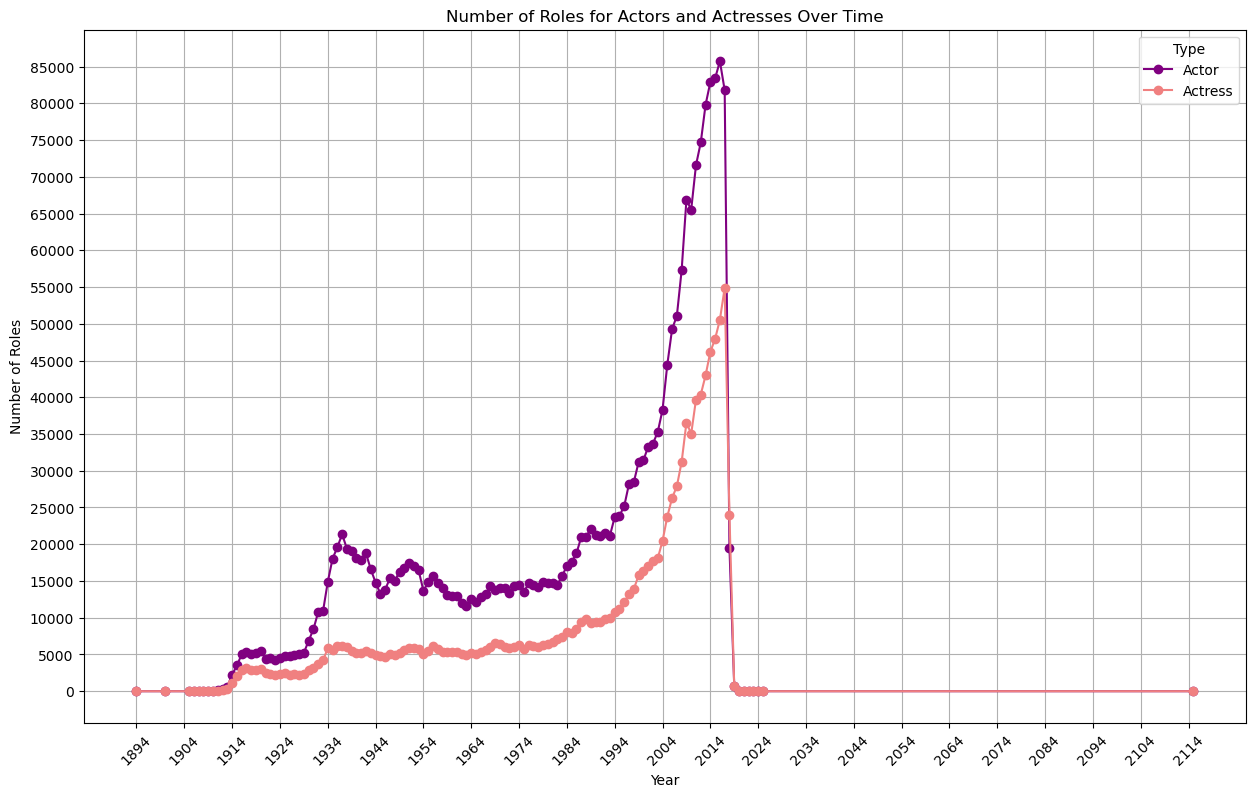

In [11]:
roles_over_time = cast.groupby(['year', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(15, 9))
roles_over_time.plot(kind='line', marker='o', linestyle='-', color=['purple', 'lightcoral'], ax=plt.gca())

plt.title('Number of Roles for Actors and Actresses Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.legend(title='Type', labels=['Actor', 'Actress'])
plt.grid(True)
plt.xticks(range(roles_over_time.index.min(), roles_over_time.index.max() + 1, 10), rotation=45)
plt.yticks(range(0, int(roles_over_time.max().max()) + 1, 5000))

plt.show()

### 9. How many "leading roles" were there in the 2000's?

In [12]:
leading_roles_2000s = cast[(cast['decade'] == 2000) & (cast['n'] == 1.0)]

num_leading_roles_2000s = len(leading_roles_2000s)

print(f"Number of leading roles in the 2000s: {num_leading_roles_2000s}")

Number of leading roles in the 2000s: 23593


### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [13]:
roles_no_ranking_2000s = cast[(cast['decade'] == 2000) & (cast['n'].isnull())]
roles_no_ranking_1950s = cast[(cast['decade'] == 1950) & (cast['n'].isnull())]

num_roles_no_ranking_2000s = len(roles_no_ranking_2000s)
num_roles_no_ranking_1950s = len(roles_no_ranking_1950s)

print(f"Number of roles with no ranking in the 2000s: {num_roles_no_ranking_2000s}")
print(f"Number of roles with no ranking in the 1950s: {num_roles_no_ranking_1950s}")

Number of roles with no ranking in the 2000s: 232037
Number of roles with no ranking in the 1950s: 95406


Conclusions:
    
As productions have grown larger over time, the number of roles in movies has increased accordingly. This could suggest that there are numerous unranked roles, either with minimal significance to the movie plots or indicating that data collection practices for these minor roles have not improved.

### 11. Plot the number of films made in each decade

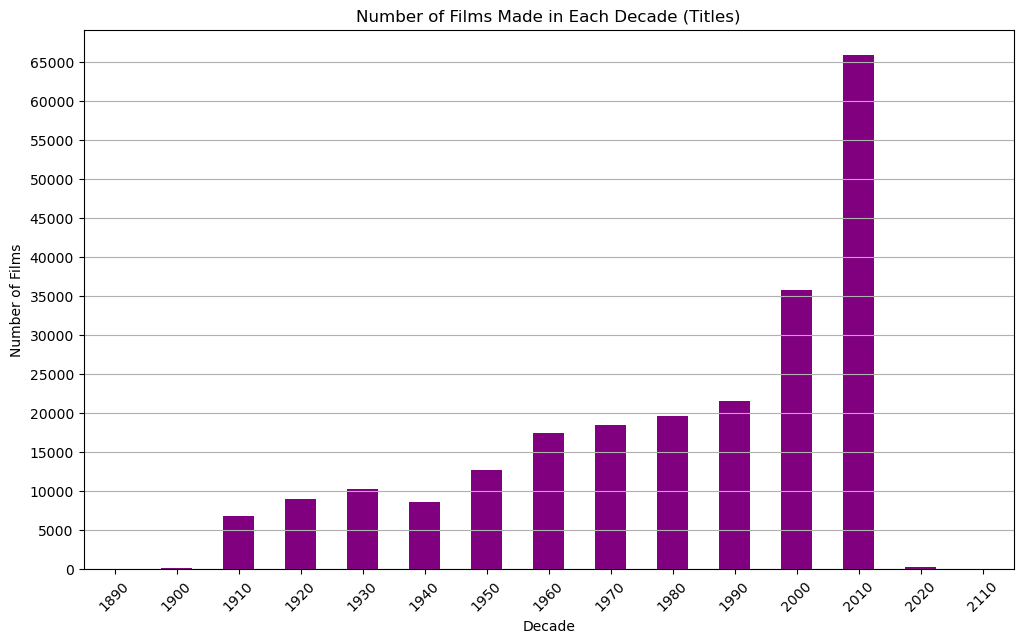

In [14]:
titles['decade'] = (titles['year'] // 10) * 10
films_per_decade_titles = titles.groupby('decade').size()

plt.figure(figsize=(12, 7))
films_per_decade_titles.plot(kind='bar', color='purple', rot=45)

plt.title('Number of Films Made in Each Decade (Titles)')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.grid(axis='y')
plt.yticks(range(0, int(films_per_decade_titles.max()) + 1, 5000))

plt.show()

### 12. Plot the number of films with a Rustler character over time

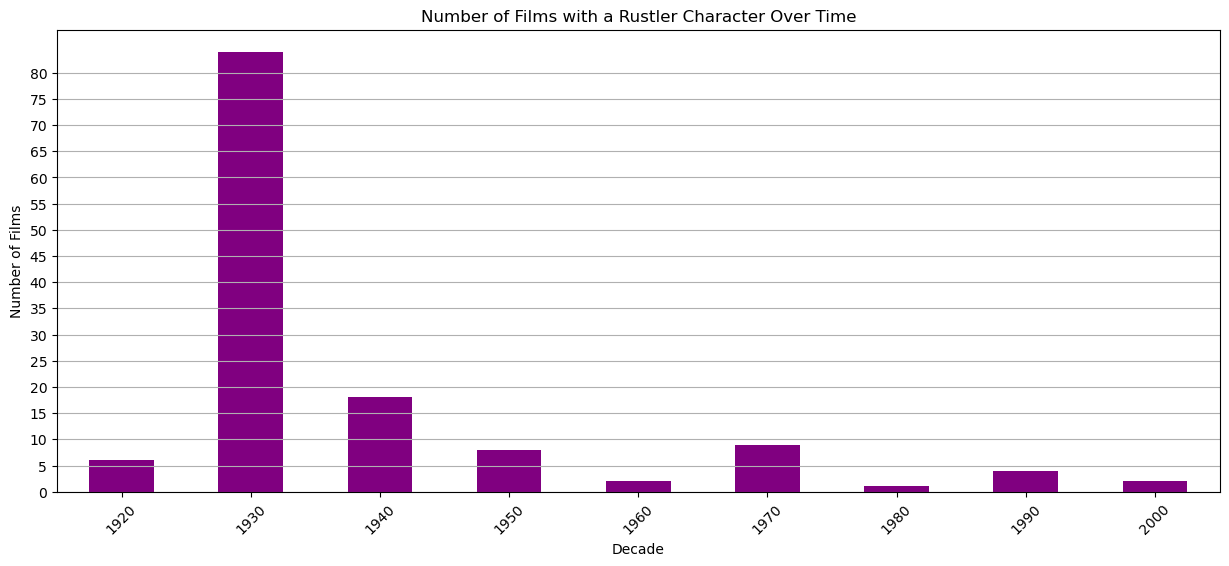

In [15]:
rustler = cast[cast['character'].str.lower() == 'rustler'].groupby('decade').size()

plt.figure(figsize=(15, 6))
rustler.plot(kind='bar', color='purple', rot=45)
plt.title('Number of Films with a Rustler Character Over Time')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.grid(axis='y')
plt.yticks(range(0, int(rustler.max()) + 1, 5))

plt.show()

### 13. What are the top ten character names of all time?

In [16]:
top_names = cast['name'].value_counts().head(10)

print("Top Ten Character Names of All Time:")
print(top_names)

Top Ten Character Names of All Time:
name
Bess Flowers       820
Herman Hack        698
Sam (II) Harris    656
Lee Phelps         615
Harold Miller      613
Frank O'Connor     598
Franklyn Farnum    561
Tom London         560
Larry Steers       553
Frank Ellis        545
Name: count, dtype: int64


### 14. Which actor appeared in the most films in the 1990's decade?

In [17]:
actor_most_films_1990s = cast[cast['decade'] == 1990]['name'].value_counts().idxmax()

print(f"The actor who appeared in the most films in the 1990s is: {actor_most_films_1990s}")

The actor who appeared in the most films in the 1990s is: Shakti Kapoor


### 15. What are the top 10 roles that start with Science?

In [18]:
science = cast[cast['character'].str.lower().str.startswith('science', na=False)]
top_science = science['character'].value_counts().head(10)

print("Top 10 Roles Starting with 'Science':")
print(top_science)

Top 10 Roles Starting with 'Science':
character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Fair Kid         5
Science Reporter         5
Science Kid              5
Science                  4
Science Fair Teacher     3
Science Officer          3
Name: count, dtype: int64


### 16. What film has the largest cast

In [19]:
largest_cast = cast.groupby(['title', 'year']).size().idxmax()[0]

print(f"The film with the largest cast is '{largest_cast}'.")

The film with the largest cast is 'Around the World in 80 Days'.


### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [20]:
cast_size_stats = cast.groupby(['title', 'year']).size().describe()

print("Descriptive Statistics for Cast Size:")
print(cast_size_stats)

Descriptive Statistics for Cast Size:
count    182497.000000
mean         18.865494
std          21.241247
min           1.000000
25%           6.000000
50%          13.000000
75%          24.000000
max        1299.000000
dtype: float64


- The dataset contains information on cast sizes for a total of 182,497 entries.


- The average cast size is approximately 18.87. This indicates that, on average, a movie in the dataset has around 19 cast members.


- The standard deviation of approximately 21.24 suggests a considerable variability in cast sizes. There is a notable spread around the mean, indicating a diverse range of cast sizes in the dataset.


- The minimum cast size is 1, and the maximum cast size is 1,299.


- Quartiles (25%, 50%, 75%):
    
    - The first quartile (25%) is 6, indicating that 25% of movies have a cast size of 6 or fewer.
    
    - The median is 13, representing the middle value in the dataset.
    
    - The third quartile (75%) is 24, indicating that 75% of movies have a cast size of 24 or fewer.

### 18. How many films has Natalie Portman been in each year throughout her career?

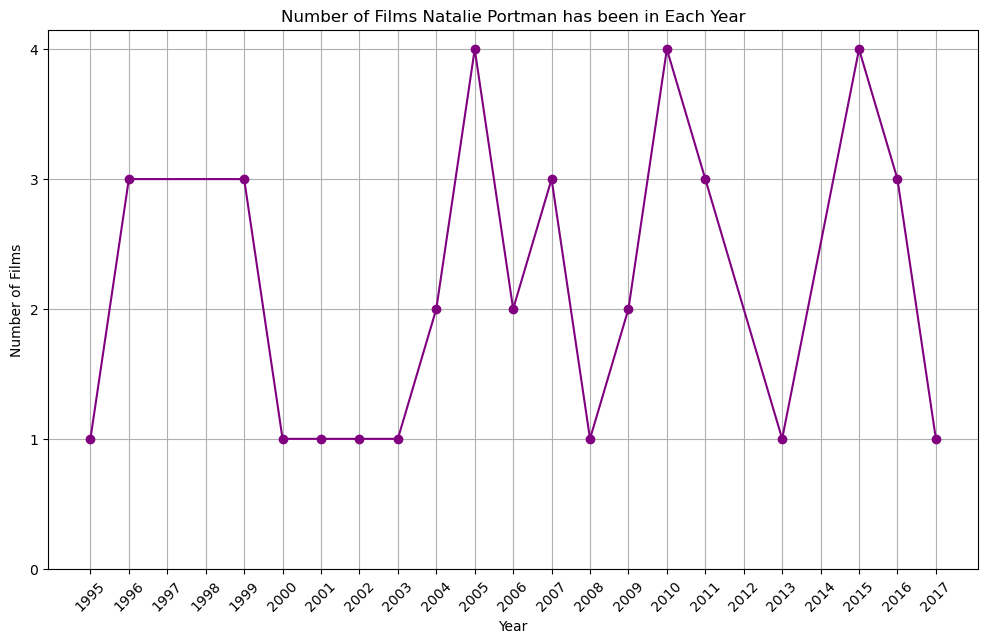

In [21]:
natalie_portman = cast[cast['name'] == 'Natalie Portman'].groupby('year').size()

plt.figure(figsize=(12, 7))
natalie_portman.plot(kind='line', color='purple', marker='o', linestyle='-', rot=45)

plt.title('Number of Films Natalie Portman has been in Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.grid(True)
plt.yticks(range(0, int(natalie_portman.max()) + 1, 1))
plt.xticks(range(int(natalie_portman.index.min()), int(natalie_portman.index.max()) + 1, 1))

plt.show()

### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

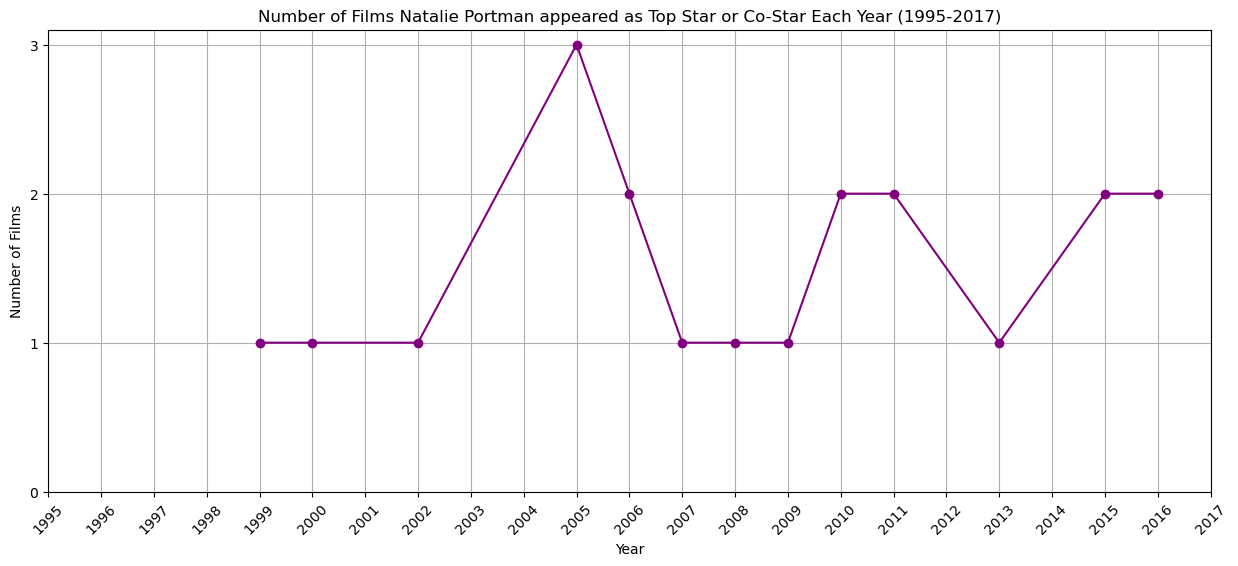

In [22]:
natalie_portman_stardom = cast[(cast['name'] == 'Natalie Portman') & ((cast['n'] == 1) | (cast['n'] == 2))].groupby('year').size()

plt.figure(figsize=(15, 6))
natalie_portman_stardom.plot(kind='line', color='purple', marker='o', linestyle='-', rot=45)

plt.title('Number of Films Natalie Portman appeared as Top Star or Co-Star Each Year (1995-2017)')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.grid(True)
plt.yticks(range(0, int(natalie_portman_stardom.max()) + 1, 1))
plt.xticks(range(1995, 2018, 1))

plt.show()

### 20. Determine how many roles for actor or actress by decade. Plot the output 

<Figure size 2000x1000 with 0 Axes>

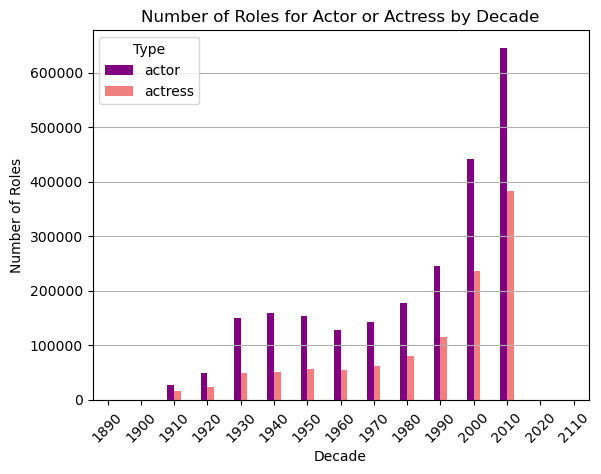

In [23]:
roles_by_decade = cast.groupby(['decade', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(20, 10))
roles_by_decade.plot(kind='bar', color=['purple', 'lightcoral'], width=0.4, align='center', rot=45)
plt.title('Number of Roles for Actor or Actress by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Roles')
plt.grid(axis='y')
plt.yticks(range(0, int(roles_by_decade.max().max()) + 1, 100000))
plt.legend(title='Type')

plt.show()


### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [24]:
release_dates['day_of_week'] = release_dates['date'].dt.day_name()
release_dates['month'] = release_dates['date'].dt.month_name()

pivot_table_day = pd.pivot_table(release_dates, values='title', index='day_of_week', aggfunc='count', fill_value=0)
pivot_table_month = pd.pivot_table(release_dates, values='title', index='month', aggfunc='count', fill_value=0)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

pivot_table_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', ax=axes[0], color='purple')
axes[0].set_title('Number of Movies Released by Day of the Week')
axes[0].set_ylabel('Number of Movies')

pivot_table_month.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']).plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Number of Movies Released by Month')
axes[1].set_ylabel('Number of Movies')

plt.tight_layout()
plt.show()


AttributeError: Can only use .dt accessor with datetimelike values

### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

I can't plot the pivot table as I get the following error:

AttributeError: Can only use .dt accessor with datetimelike values

So, in order to fix it, I'll convert the 'date' column to datetime type.

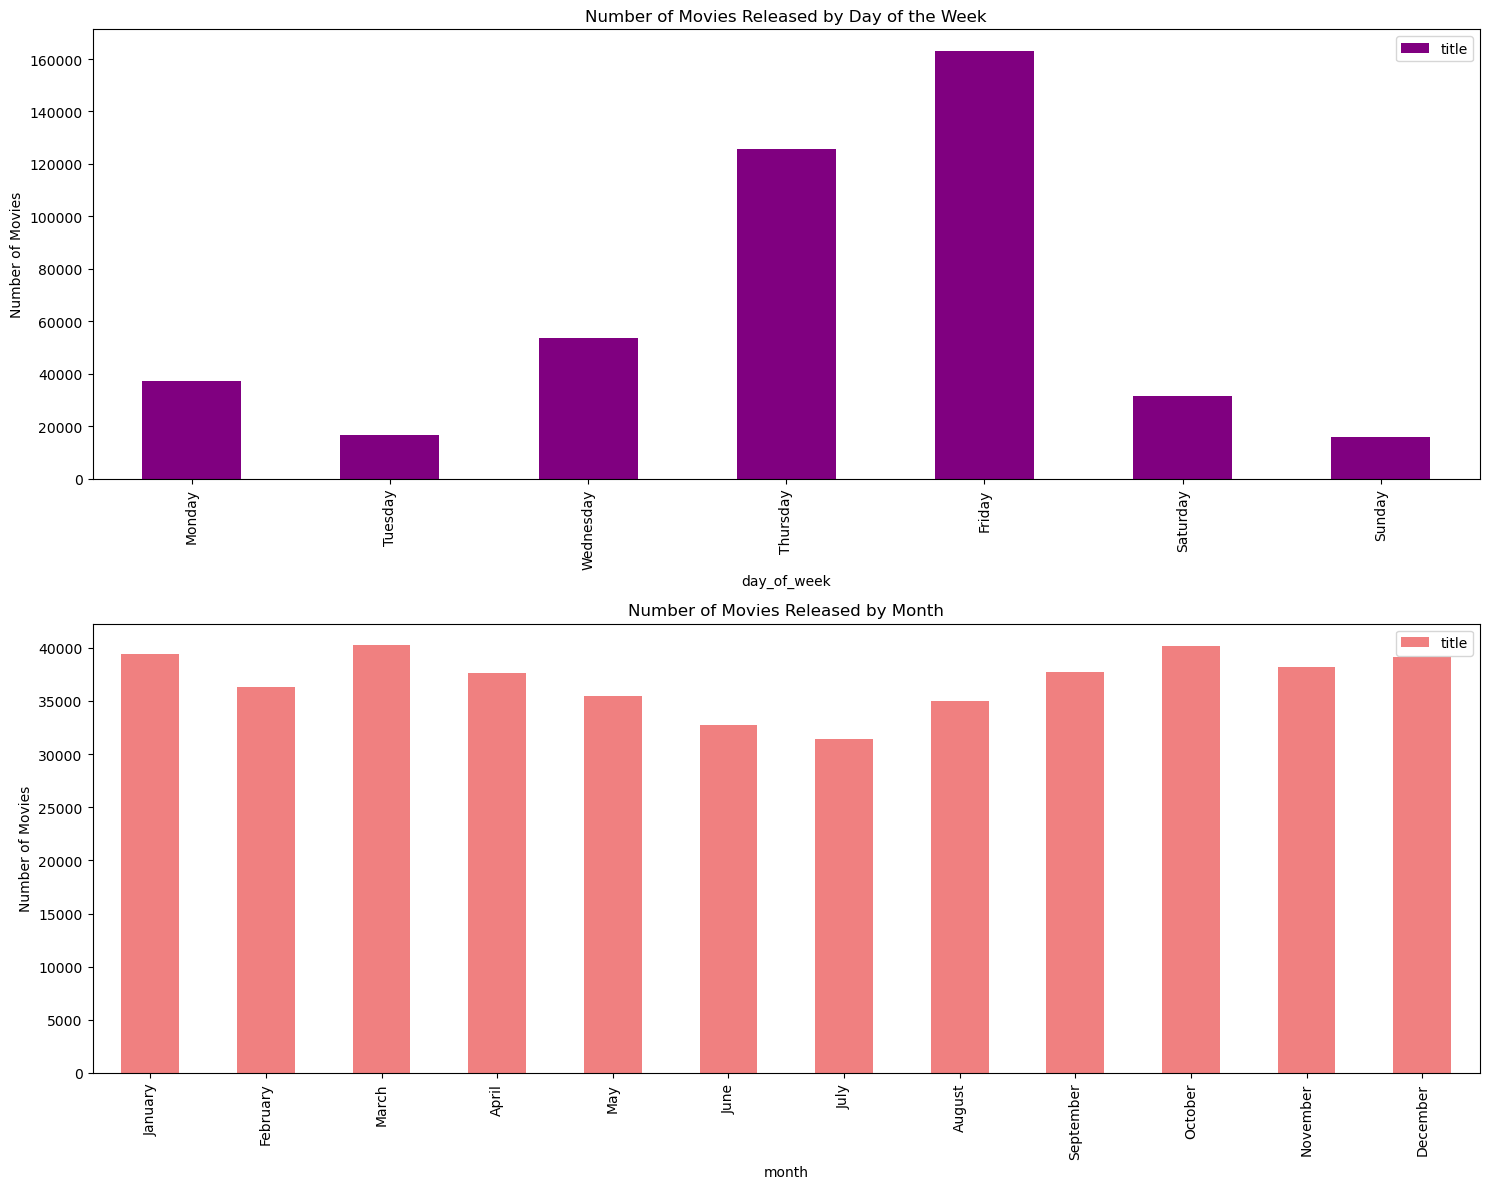

In [25]:
#Convertion:
release_dates['date'] = pd.to_datetime(release_dates['date'])

#Rest of the code:
release_dates['day_of_week'] = release_dates['date'].dt.day_name()
release_dates['month'] = release_dates['date'].dt.month_name()

pivot_table_day = pd.pivot_table(release_dates, values='title', index='day_of_week', aggfunc='count', fill_value=0)
pivot_table_month = pd.pivot_table(release_dates, values='title', index='month', aggfunc='count', fill_value=0)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

pivot_table_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', ax=axes[0], color='purple')
axes[0].set_title('Number of Movies Released by Day of the Week')
axes[0].set_ylabel('Number of Movies')

pivot_table_month.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']).plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Number of Movies Released by Month')
axes[1].set_ylabel('Number of Movies')

plt.tight_layout()
plt.show()


The most popular days of the week for releasing films are Thursdays and Fridays, with the latter being the most preferred. On the other hand, we observe that the number of films released per month doesn't vary significantly; however, July stands out as the month with the fewest movies released.

### 23. What films did actors in Star Wars go on to appear in? 

In [26]:
star_wars_actors = cast.dropna(subset=['title'])
star_wars_actors = star_wars_actors[star_wars_actors['title'].str.contains('Star Wars', case=False)]['name'].unique()

star_wars_cast = cast[cast['name'].isin(star_wars_actors)]

actors_appeareances = star_wars_cast.groupby('name')['title'].agg(list).reset_index()

for index, row in actors_appeareances.iterrows():
    actor = row['name']
    films = row['title']
    print(f"\n{actor} appeared in:")
    for film in films:
        print(f" - {film}")


Aaliyah Williams appeared in:
 - Star Wars: Episode III - Revenge of the Sith

Aaron (IV) Kennedy appeared in:
 - One Square Mile
 - Run All Night
 - Star Wars: Episode VII - The Force Awakens

Adam Bareham appeared in:
 - Star Wars: Episode VI - Return of the Jedi
 - Wilt

Adam Driver appeared in:
 - Bluebird
 - Frances Ha
 - Gayby
 - Hungry Hearts
 - Inside Llewyn Davis
 - J. Edgar
 - Lincoln
 - Logan Lucky
 - Midnight Special
 - Not Waving But Drowning
 - Paterson
 - Silence
 - Star Wars: Episode VII - The Force Awakens
 - The F Word
 - The Man Who Killed Don Quixote
 - The Meyerowitz Stories (New and Selected)
 - This Is Where I Leave You
 - Tough as They Come
 - Tracks
 - While We're Young

Adrian Allan appeared in:
 - Acquainted
 - Bridget Jones: The Edge of Reason
 - Bridget Jones: The Edge of Reason
 - Furious 6
 - Guardians of the Galaxy
 - Guardians of the Galaxy
 - Mamma Mia!
 - Star Wars: Episode VII - The Force Awakens

Adrian Man appeared in:
 - Call of the Jedi: A Star 